In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import pandas as pd

In [2]:
calls=pd.read_csv('911.csv')

In [3]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [5]:
calls['zip'].value_counts().head(5);

In [6]:
zip

zip

In [7]:
calls['twp'].value_counts().head(5)

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

In [52]:
calls['twp'].head()

0          NEW HANOVER
1    HATFIELD TOWNSHIP
2           NORRISTOWN
3           NORRISTOWN
4     LOWER POTTSGROVE
Name: twp, dtype: object

In [10]:
calls['title'].nunique()

141

In [11]:
calls['title']

0                 EMS: BACK PAINS/INJURY
1                EMS: DIABETIC EMERGENCY
2                    Fire: GAS-ODOR/LEAK
3                 EMS: CARDIAC EMERGENCY
4                         EMS: DIZZINESS
5                       EMS: HEAD INJURY
6                   EMS: NAUSEA/VOMITING
7             EMS: RESPIRATORY EMERGENCY
8                  EMS: SYNCOPAL EPISODE
9            Traffic: VEHICLE ACCIDENT -
10           Traffic: VEHICLE ACCIDENT -
11           Traffic: VEHICLE ACCIDENT -
12           Traffic: VEHICLE ACCIDENT -
13           Traffic: VEHICLE ACCIDENT -
14           Traffic: VEHICLE ACCIDENT -
15           Traffic: VEHICLE ACCIDENT -
16            EMS: RESPIRATORY EMERGENCY
17                        EMS: DIZZINESS
18                 EMS: VEHICLE ACCIDENT
19           Traffic: DISABLED VEHICLE -
20           Traffic: VEHICLE ACCIDENT -
21           Traffic: DISABLED VEHICLE -
22                  Fire: APPLIANCE FIRE
23           Traffic: DISABLED VEHICLE -
24           Tra

In [12]:
x=calls['title'].iloc[0]

In [13]:
x

'EMS: BACK PAINS/INJURY'

In [14]:
calls['title'].split(':')[0]

AttributeError: 'Series' object has no attribute 'split'

In [15]:
calls['Reason']=calls['title'].apply(lambda title: title.split(':')[0])

In [16]:
calls['Reason'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: Reason, dtype: int64

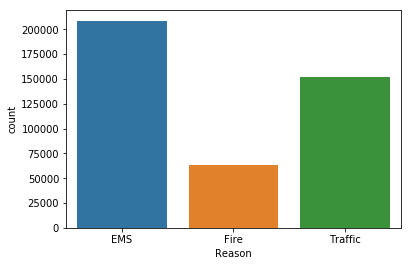

In [17]:
sns.countplot(x='Reason',data=calls)

In [18]:
calls['timeStamp'].iloc[0]

'2015-12-10 17:10:52'

In [19]:
calls['timeStamp']=pd.to_datetime(calls['timeStamp'])

In [20]:
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 10 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null datetime64[ns]
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
Reason       423909 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 32.3+ MB


In [21]:
time=calls['timeStamp'].iloc[0]
time.date

<function Timestamp.date>

In [22]:
calls['Hours']=calls['timeStamp'].apply(lambda time:time.hour)
calls['Month']=calls['timeStamp'].apply(lambda time:time.month)
calls['Day']=calls['timeStamp'].apply(lambda time:time.dayofweek)
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hours,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [23]:
dmap={0:'Mon',1:'Tues',2:'Wed',3:'Thu',4:'Fri',5:'sat',6:'Sun'}

In [24]:
calls["Day"]=calls["Day"].map(dmap)

In [25]:
calls.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hours,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


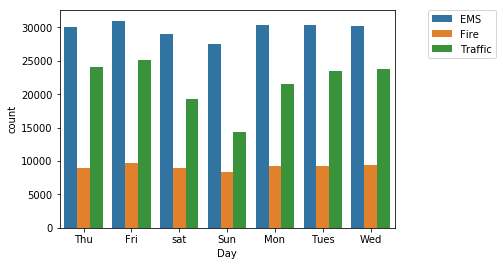

In [26]:
sns.countplot(x='Day',data=calls,hue='Reason')
plt.legend(bbox_to_anchor=(1.10,1),loc=2,borderaxespad=0.)

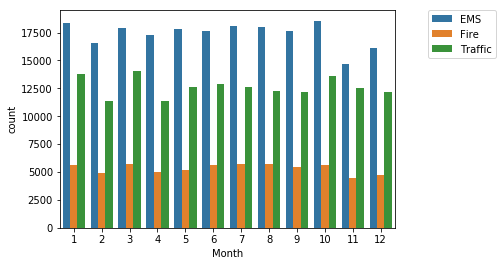

In [27]:
sns.countplot(x='Month',data=calls,hue='Reason')
plt.legend(bbox_to_anchor=(1.10,1),loc=2,borderaxespad=0.)

In [28]:
bymonth=calls.groupby('Month').count()

In [29]:
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hours,Day
Month,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666
4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583
5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644
6,36171,36171,36171,31501,36171,36171,36152,36171,36171,36171,36171,36171
7,36405,36405,36405,31863,36405,36405,36391,36405,36405,36405,36405,36405
8,35972,35972,35972,31512,35972,35972,35957,35972,35972,35972,35972,35972
9,35339,35339,35339,30772,35339,35339,35325,35339,35339,35339,35339,35339


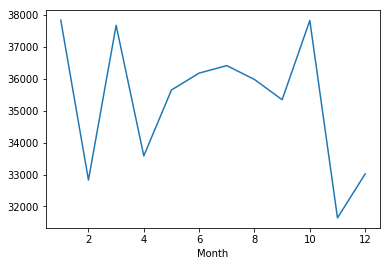

In [30]:
bymonth['lat'].plot()

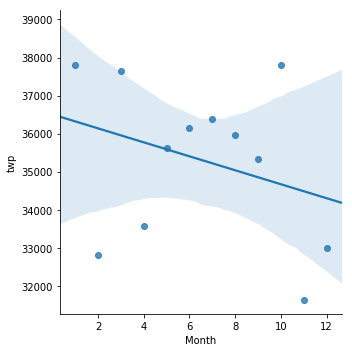

In [31]:
bymonth=bymonth.reset_index()
sns.lmplot(x='Month',y='twp',data=bymonth)

In [32]:
time

Timestamp('2015-12-10 17:10:52')

In [33]:
calls['date']=calls['timeStamp'].apply(lambda time: time.date())

In [34]:
calls

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hours,Month,Day,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,15,12,Thu,2015-12-10
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,16,12,Thu,2015-12-10
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,16,12,Thu,2015-12-10
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,16,12,Thu,2015-12-10
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,17,12,Thu,2015-12-10


In [49]:
#

In [46]:
bydate=calls.groupby('date')['twp'].count()

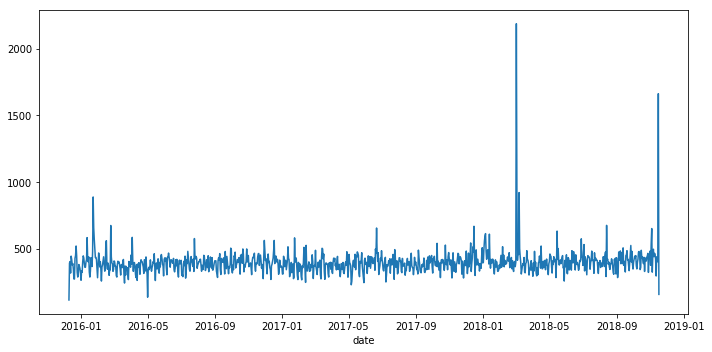

In [48]:
plt.figure(figsize=(10,5))
bydate.plot()
plt.tight_layout()

In [38]:
byfire=calls[calls['Reason']=='Fire'].groupby('date').count()

Text(0.5, 1.0, 'Fire')

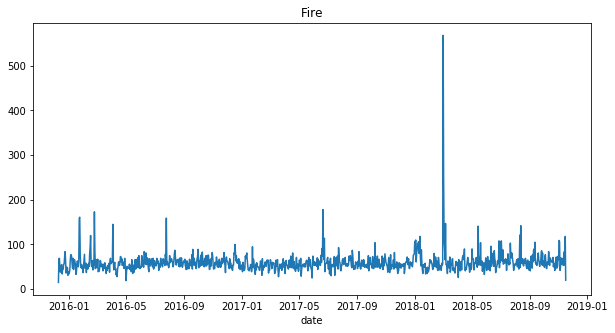

In [39]:
plt.figure(figsize=(10,5))
byfire['twp'].plot()
plt.title('Fire')

Text(0.5, 1.0, 'Traffic')

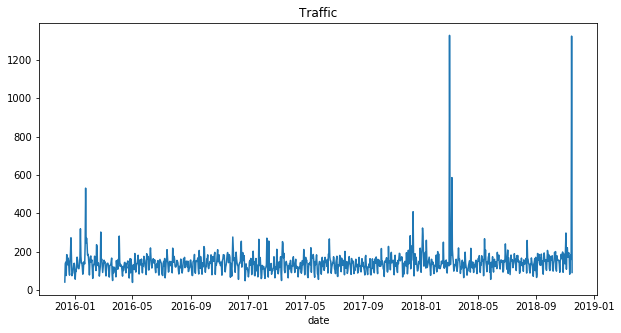

In [40]:
plt.figure(figsize=(10,5))
plt.tight_layout()
calls[calls['Reason']=='Traffic'].groupby('date')['twp'].count().plot()
plt.title('Traffic')

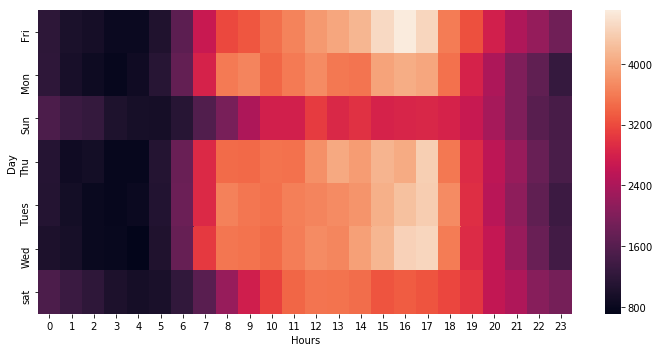

In [41]:
calldayhours=calls.groupby(by=['Day','Hours'])['Reason'].count().unstack()
plt.figure(figsize=(10,5))
sns.heatmap(calldayhours)
plt.tight_layout()

In [42]:
callsdaymonth=calls.groupby(by=['Day','Month'])['Reason'].count().unstack()

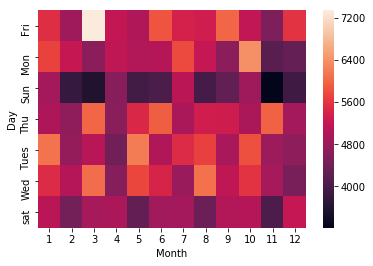

In [43]:
sns.heatmap(callsdaymonth)